# Part 1 of the Machine Learning Project

## Preliminaries


Before satring familiarize yourself with pandas reading the “10 minutes to pandas” tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Browse through the full pandas user guide when needed: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html


## Load libraries

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# File system manangement
import os

# Suppress warnings
#import warnings
#warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>


<h1>Datasets</h1>

In [2]:
## Change this part with your own dataset files

src_train = 'data/application_train.csv.zip'
src_test = 'data/application_test.csv.zip'

src_previous ='data/previous_application.csv.zip'
src_bureau = 'data/bureau.csv.zip'

# If you cannot load the directly the csv from Google drive (Google restrictions), download them manually then change the path to load them locally

app_train = pd.read_csv(src_train, compression="zip")
app_train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<h1>Loading the datasets (2 pts)</h1>

1. Similarly to the train set, load the test set, the bureau dataset and the past applications dataset.

2. Display for each the number of rows and the number of columns

*You will be evaluated as follow*
* 1: Correct approach + code: 1pt
* 2: Code: 1pts


In [7]:
#Your code here
#The variables that should be implemented to store the data are: app_train, app_test, bureau, app_past


# 1 - Loading the different datasets.
app_test = pd.read_csv(src_test, compression="zip")
bureau = pd.read_csv(src_bureau, compression="zip")
app_past = pd.read_csv(src_previous, compression="zip")

# 2 - The number of rows and columns for each
print(f"The shape of app_train:{app_train.shape}")
print(f"The shape of app_test:{app_test.shape}")
print(f"The shape of bureau:{bureau.shape}")
print(f"The shape of app_past:{app_past.shape}")



The shape of app_train:(307511, 122)
The shape of app_test:(48744, 121)
The shape of bureau:(1716428, 17)
The shape of app_past:(1670214, 37)


<h1> Feature Engineering</h1>

<h2>Missing values (9pts)</h2>


**3.a**: What columns are missing the most values in app_test?

**3.b**: What columns are missing the most values in bureau?

**3.c**: What columns are missing the most values in app_past?

4: Fix missing data in app_test dataset using categorization and/or simple imputation when appropriate. Be careful to the **data leakage** issue!

*You will be evaluated as follow*
* 3: Correct approach + code 2pts.
* 4: Description of the approach 4pts. Code implementation of the approach 3pts.

In [21]:
from sklearn.impute import SimpleImputer
# 3
# 3.a
missing_values_app_test = app_test.isnull().sum()
missing_values_app_test_sorted = missing_values_app_test.sort_values(ascending=False)
print(f"The most columns with most missing values in app_test:\n{missing_values_app_test_sorted.head(10)}\n")
# 3.b
missing_values_bureau = bureau.isnull().sum()
missing_values_bureau_sorted = missing_values_bureau.sort_values(ascending=False)
print(f"The most columns with most missing values in bureau:\n{missing_values_bureau_sorted.head(10)}\n")
# 3.c
missing_values_app_past = app_past.isnull().sum()
missing_values_app_past_sorted = missing_values_app_past.sort_values(ascending=False)
print(f"The most columns with most missing values in app_past:\n{missing_values_app_past_sorted.head(10)}\n")

# 4: Fix missing data in app_test using categorization and/or simple imputation when appropriate. You should use *only* pandas and numpy here. You should *not* use sklearn (scikit-learn).
categorical_columns = app_test.select_dtypes(include=['object']).columns.tolist()
continuous_columns = app_test.select_dtypes(include=['number']).columns.tolist()

app_test[categorical_columns]=SimpleImputer(strategy='constant',fill_value='missing')
app_test[continuous_columns]=SimpleImputer(strategy='mean')

# check the outcomes
missing_values_app_test_2 = app_test.isnull().sum()
missing_values_app_test_2_sorted = missing_values_app_test_2.sort_values(ascending=False)
print(f"The most columns with most missing values in app_test afterwards:\n{missing_values_app_test_2_sorted.head(10)}\n")

The most columns with most missing values in app_test:
SK_ID_CURR                  0
COMMONAREA_MODE             0
EMERGENCYSTATE_MODE         0
WALLSMATERIAL_MODE          0
TOTALAREA_MODE              0
HOUSETYPE_MODE              0
FONDKAPREMONT_MODE          0
NONLIVINGAREA_MEDI          0
NONLIVINGAPARTMENTS_MEDI    0
LIVINGAREA_MEDI             0
dtype: int64

The most columns with most missing values in bureau:
AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM                 13
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
dtype: int64

The most columns with most missing values in app_past:
RATE_INTEREST_PRIVILEGED     1664263
RATE_INTEREST_PRIMARY        1664263
AMT_DOWN_PAYMENT              895844
RATE_DOWN_PAYMENT             895844
NAME_TYPE_SUITE      

**4**: Describe your approach, including how you choose the technique to apply, and how you apply the technique (double click to edit a text cell)

**Identification:**
I first used the isnull() method followed by sum() to calculate the total number of missing values for each column in the three datasets. This helped me to understand the extent of the missing data and identify which columns had the most significant gaps.

**Categorical and Continuous Variables:**
I categorized the columns of the app_test dataset into two groups: categorical variables (object types) and continuous variables (numerical types). This categorization is crucial as it informs the choice of imputation techniques.

**Imputation Strategy:**
For categorical variables, I decided to use a constant imputation strategy, filling missing values with the string "missing." This technique is appropriate for categorical data because it helps retain the structure of the dataset without introducing biases.
For continuous variables, I opted for mean imputation. The mean is a standard statistical measure that provides a reasonable estimate for filling in missing values, especially when the distribution is not heavily skewed.

**Implementation:**
For categorical columns, I used the SimpleImputer class from scikit-learn to fill in missing values with "missing."
For continuous columns, I applied the mean of the existing values to replace missing data.

**Verify the Results：**
After applying the imputation techniques, I rechecked the dataset to ensure that all missing values were addressed.

## Class Imbalance (8 pts)

5. Evaluate the class imbalance of the training set.

6. **a** Fix the class imbalance with over/undersampling

 **b** Use the SMOTE algorithm to fix class imbalance

*You will be evaluated as follow*
* 5: Correct approach + code: 2ts
* 6.a: code 3pt
* 6.b: code 3pts

Class distribution:
 TARGET
0    282686
1     24825
Name: count, dtype: int64


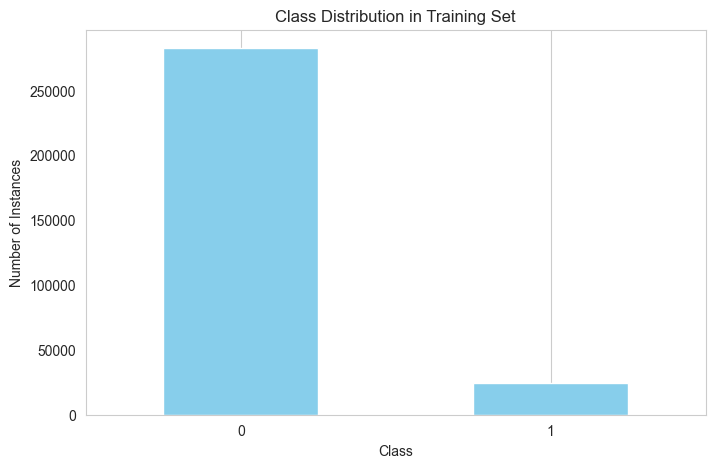

In [24]:
import matplotlib.pyplot as plt

# 5 - value counts
class_counts = app_train['TARGET'].value_counts()
print("Class distribution:\n", class_counts)

# 5 - histograms
plt.figure(figsize=(8, 5))
app_train['TARGET'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# train_columns = set(app_train.columns)
# test_columns = set(app_test.columns)
# missing_in_test = train_columns - test_columns
# print("在 app_train 中有但在 app_test 中没有的列:")
# print(missing_in_test)

**5**: Describe briefly your observation (double click to edit a text cell)

Class 0: This class has a significantly larger number of instances.
Class 1: In contrast, this class contains fewer than one-tenth of the instances of Class 0.

This distribution indicates that Class 0 is the majority class, while Class 1 is the minority class. Such a disparity can lead to potential issues during model training, as algorithms may become biased toward predicting the majority class (Class 0) due to its overwhelming presence in the dataset.

In [25]:
# copy your current dataframe with its .copy() method. You should always use the copy() method if you want to keep the original dataframe untouched when you modify
# this is a very common bug, so please read  https://www.statology.org/pandas-copy-dataframe/

## Your code here
app_train_original = app_train.copy()


# 6.a - fix imbalance with undersampling or oversampling
# Implement undersampling or oversampling *without* external libraries, only the library provided to implement yourself the chosen solution.

## Your code here


# 6.b - fix balance with SMOTE on your previously copied dataframe
# You can use any external libraries to use SMOTE. We recommend the imbalanced-learn package https://imbalanced-learn.org/stable/over_sampling.html
# Make sure to select the appropriate SMOTE variant.


## Your code here
app_train_smote = ...


# We will use the dataframe app_train from 6.a in the following

<h2>Categorical features (9pts)</h2>

In `app_test`

**7a**: How will you transform the column NAME_HOUSING_TYPE in app_test be correctly handled by the model? How will you transform CODE_GENDER column?

**7b**: How would you transform the column NAME_HOUSING_TYPE in app_test if you want only 3 categories? Use LabelEncoder to transform FLAG_OWN_CAR column.

**7c**: In ORGANIZATION_TYPE, only keep the categories that appear in more than 10% of the dataset. Group other categories in one. What is the size of the dummy vector for ORGANIZATION_TYPE after this transformation?


8: **In app_test, app_past and bureau,** transform all the categorical columns that you have not processed in 7 using One-hot encoding.

*You will be evaluated as follow*
* 7: Description of the approach 4pts. Code 3pts.
* 8: Correct approach + code 2pts.

In [ ]:
## Your code here

<h2>Anomalies (7 pts)</h2>

**In app_test**

**9a**: Is there an anomaly with the column DEF_30_CNT_SOCIAL_CIRCLE? If so, how would you solve it?

**9b**: Is there an anomaly with the column LANDAREA_AVG? If so, how would you solve it?

**9c**: Is there an anomaly with the column AMT_INCOME_TOTAL? If so, how would you solve it?

10: Fix the anomaly in DAYS_EMPLOYED?

*You will be evaluated as follow*
* 9: Description of the approach + code 5pts.
* 10: code 2pts

In [ ]:
## Your code here

<h2>Correlations (9 pts)</h2>


11: **In app_test**, remove the collinear features of the dataset. How did you choose the threshold?

12: What features from bureau.csv could you use to improve the training set? Use the random forest model from the notebook of the Lecture to check if it actually improves the final model performance.

*You will be evaluated as follow*
* 11: Code 3pts. Threshold explanation 1pt.
* 12: Description of the approach 1pt. Code implementation of the approach 2pts. Improved performance 2pts.

In [ ]:
## Your code here

##  Class imbalance and model performances (6 points)


**13**: Evaluate the other technique (SMOTE) to handeling imbalance data left in *6.b*. Does it makes a difference on the final model performance? Can you use the performance on the test set to choose which techniques to use? If not, what would you need to do so?

*You will be evaluated as follow*
* 13: Code 3pts. Explanation 3pts.


In [ ]:
## Your code here

**13**: Answer the question here (double click to edit a text cell)

